# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

## Book 2: Continued EDA, Pre-Processing

Author: Patrick Smith

Date: 24/03/2024

Contact: patrick.b.smith@gmail.com

         *                 *                  *              *
                                                      *             *
                        *            *                             ___
  *               *                                          |     | |
        *              _________##                 *        / \    | |
                      @\\\\\\\\\##    *     |              |--o|===|-|
  *                  @@@\\\\\\\\##\       \|/|/            |---|   |p|
                    @@ @@\\\\\\\\\\\    \|\\|//|/     *   /     \  |b|
             *     @@@@@@@\\\\\\\\\\\    \|\|/|/         |  U    | |s|
                  @@@@@@@@@----------|    \\|//          |  K    |=| |                                                                                                                       

## Description of Variables 

| Column                         | Descriptor                                                                 | Datatype |
|--------------------------------|----------------------------------------------------------------------------|----------|
| Year                           | The period in which the event occurred.                                    | int32    |
| Quarter                        | Quarter of the year (Q1=1, Q2=2, Q3=3, Q4=4).                              | object   |
| Nationality                    | Nationality of the individual.                                             | object   |
| Region                         | World region of the country of nationality for the individual.              | object   |
| Return type group              | Grouped type of return (enforced, voluntary, refused entry at port).         | object   |
| Return type                    | Specific type of return (enforced, voluntary, refused entry).               | object   |
| Age                            | Age of the individual at the time of the event.                             | object   |
| Sex                            | Gender of the individual (male, female, other/unknown).                     | int32    |
| Return destination group       | Grouped destination country for return (Home country, EU, Other country).   | object   |
| Return destination             | Specific destination country for return.                                    | object   |
| Number of returns              | Count of returns.                                                           | float64  |
| Visa type group                | Grouped type of sponsored work visa applied for.                            | object   |
| Visa type subgroup             | Detailed type of sponsored work visa applied for.                           | object   |
| Applicant type                 | Type of applicant (main applicant, dependant).                             | object   |
| Case outcome                   | Outcome of the case (granted, refused, withdrawn, resettlement).             | object   |
| Decisions                      | Number of decisions made.                                                   | float64  |
| Case type                      | Type of case (asylum, resettlement).                                       | object   |
| Case outcome group             | Grouped outcome of the case (granted protection, grant of other leave, refused, withdrawn). | object   |
| UASC                           | Indicates if the applicant is an Unaccompanied Asylum-Seeking Child.       | object   |
| Host Country                   | Country where the individual first sought asylum for resettlement cases.    | object   |
| Location of application        | Location where the application was submitted.                               | object   |
| Applications                   | Number of applications made.                                               | float64  |
| Occupation                     | Occupation of the individual.                                              | object   |
| Industry                       | Industry sector for which the application to work was made.                 | object   |
| Occ. major group               | Major group classification of the occupation.                              | object   |
| Occ. sub-major group           | Sub-major group classification of the occupation.                          | object   |
| Occ. minor group               | Minor group classification of the occupation.                              | object   |
| Occ. unit group                | Unit group classification of the occupation.                               | object   |
| Category of leave group        | Grouped category of extension applied for (work, study, family, other).     | object   |
| Category of leave              | Category of extension applied for.                                         | object   |
| Category of leave subgroup     | Detailed category of extension applied for.                                | object   |
| Current category of leave group| Grouped current category of leave (work, study, family, other).            | object   |
| Current category of leave      | Current category of leave.                                                 | object   |
| Previous category of leave group | Grouped previous category of leave (work, study, family, other).         | object   |
| Previous category of leave     | Previous category of leave.                                                | object   |
| Sex_Male                       | Dummy variable for male (1 if male, 0 otherwise).                          | object   |
| Sex_Female                     | Dummy variable for female (1 if female, 0 otherwise).                      | object   |
| Sex_Other                      | Dummy variable for other or NA (1 if other/unknown, 0 otherwise).          | object   |
| UK Region                      | The UK region in which the citizenship ceremony took place.                | object   |

## Table of Contents - Book 2

[Data Loading, Objectives, and Initial Clean ](#Load) 

[Dataset Summary](#Dataset_summary)

[Initial Preprocessing and Cleaning](#Initial_Preprocessing) 

[Initial Dataset Summary](#Dataset_summary)

[Preprocessing: Applications, Decisions, and Grants](#ADG) 

[Preprocessing: Case Outcome](#Case_Outcome) 

[Preprocessing: Visa Outcome](#Visa_Outcomes) 

[Preprocessing: Age](#Age) 

## Data Loading

<div id='Load'></div>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import warnings

## Next Objective

1) Finish our EDA and do some pre-processing, to get ready for baseline modelling
2) Focus on dependent variable, case outcome, and its related case columns (two more)
3) Other columns of importance; Age, Sex, 
4) Improve the dataset's quality by reducing the number of 'unknown', as well as nulls

After, we will move on to data preprocessing and modelling on the other notebook.

Displaying max columns

In [2]:
pd.options.display.max_columns = None

Reading the CSV file exported from the EDA file (book 1) and setting as df (dataframe)

In [3]:
df_combined = pd.read_csv(r'C:\Users\patri\Downloads\df_combined_EDA1.csv', low_memory=False)

Displaying a sample to see what the columns are like

In [4]:
df_combined.sample(5)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Applicant type,Case outcome,Decisions,Case type,Case outcome group,UASC,Application type,Grants,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region
778240,2021,3,France,EU 14,NaN,NaN,Unknown,3,NaN,NaN,Family,All,Refused,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Europe
263321,2010,3,Former Yugoslavia,Europe Other,NaN,NaN,Unknown,3,NaN,NaN,Study,Main Applicant,Withdrawn,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Europe
10494,2003,3,Serbia and Montenegro,Europe Other,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Issued,39.0,Asylum Case,Withdrawn,Total (pre-2006),NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Europe
986353,2023,2,France,EU 14,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2.0,3567 - health and safety officers,education,associate professional and technical occupations,business and public service associate professi...,public services and other associate professionals,health and safety officers,Europe
787307,2021,3,Mauritius,Africa Sub-Saharan,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,0.0,2129 - engineering professionals n.e.c.,construction,professional occupations,"science, research, engineering and technology ...",engineering professionals,engineering professionals n.e.c.,Africa


Ok we have a lot of unknowns and 0s. We need to look into this. Otherwise our models and predictions won't be accurate.

Checking if there are any nulls

In [5]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group           76.895043
Return type                 76.895043
Age                          0.000000
Sex                          0.000000
Return destination group    76.895043
Number of returns           76.895043
Visa type group             70.034898
Applicant type              52.157214
Case outcome                58.921874
Decisions                    0.000000
Case type                   88.886977
Case outcome group          88.886977
UASC                        82.122316
Application type            87.884675
Grants                       0.000000
Applications                 0.000000
Occupation                  83.824712
Industry                    83.824712
Occ. major group            83.824712
Occ. sub-major group        83.824712
Occ. minor group            83.824712
Occ. unit group             83.824712
General_Regi

Still a lot of nulls. Lets check the shape, percentage of nulls.

In [6]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group           76.895043
Return type                 76.895043
Age                          0.000000
Sex                          0.000000
Return destination group    76.895043
Number of returns           76.895043
Visa type group             70.034898
Applicant type              52.157214
Case outcome                58.921874
Decisions                    0.000000
Case type                   88.886977
Case outcome group          88.886977
UASC                        82.122316
Application type            87.884675
Grants                       0.000000
Applications                 0.000000
Occupation                  83.824712
Industry                    83.824712
Occ. major group            83.824712
Occ. sub-major group        83.824712
Occ. minor group            83.824712
Occ. unit group             83.824712
General_Regi

OK let's make case outcome a priority then we'll move on to filling the others as much as we can

These are all the catagorical columns, the 0s are numerical. 

To build a useful model, we will build a refined dataframe. 

Before hand, we will try to reduce the high percentages of unknowns to improve the quality of the data

For categorical columns, we can:

- Focus on Age, Applicant type, Case Type, and Case outcome group 
- Later priority are the occupation

Now let's look at percentages of 0s

In [7]:
zero_percentage_numeric = (df_combined == 0).sum() / df_combined.shape[0] * 100
print(zero_percentage_numeric)

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group            0.000000
Return type                  0.000000
Age                          0.000000
Sex                          0.000000
Return destination group     0.000000
Number of returns            0.000000
Visa type group              0.000000
Applicant type               0.000000
Case outcome                 0.000000
Decisions                   58.921874
Case type                    0.000000
Case outcome group           0.000000
UASC                         0.000000
Application type             0.000000
Grants                      79.172100
Applications                85.010983
Occupation                   0.000000
Industry                     0.000000
Occ. major group             0.000000
Occ. sub-major group         0.000000
Occ. minor group             0.000000
Occ. unit group              0.000000
General_Regi

OK we have a fair amount of 0s in Decisions, Grants and Applications. We will work on this

Checking for duplicates

In [8]:
df_combined.duplicated().sum()

15708

OK we can delete these, setting new df as clean_df

In [9]:
clean_df = df_combined.drop_duplicates()

In [10]:
print(f"We have {clean_df.shape[0]} rows and {clean_df.shape[1]} columns with string, floats and integers in our clean data.")

We have 1012725 rows and 27 columns with string, floats and integers in our clean data.


Let's look at uniques:

In [11]:
clean_df.nunique()

Year                          23
Quarter                        4
Nationality                  239
Region                        17
Return type group              3
Return type                    6
Age                            6
Sex                            3
Return destination group       4
Number of returns            326
Visa type group                6
Applicant type                 5
Case outcome                   6
Decisions                   4843
Case type                      2
Case outcome group             4
UASC                           4
Application type               4
Grants                      1040
Applications                 756
Occupation                   324
Industry                      22
Occ. major group              11
Occ. sub-major group          28
Occ. minor group              97
Occ. unit group              320
General_Region                 7
dtype: int64

### Dataset Summary & Insights

<div id='Dataset_summary'></div>

With the insight of uniques, we can see that the dataset, comprising 28 columns, is categorized into several key areas, showcasing its diversity and suitability for analysis on migration, asylum, and labor trends in the UK. Below are summarized insights:

Time:
- Year covers 23 years, so its a long-term collection of data where we can figure out trends. We can use this with quarter to see if there's any seasonal trends

Geographic and demographics: 
- Nationalities has a wide diversity of 239. Regions of 16 could help in geographical categorizations and could help with regional trends.  General Region (7) was created to provide a broader regional classification for high-level geographic analysis.
- For demographics, there is also Age (6) and Sex (3) , which will be helpful in our modelling because we have a high percentage of non-unknowns
  
Case characteristics, application and decision: 
- Decisions (4844), Grants (1040), Applications (756): A wide range of outcomes - this could provide interesting insights into the UK immigration system's capacity
- Case Case outcome (6), Case outcome group (5) and Case type (3) are our target categories - our plan is to improve the quality of data in these columns by imputations
- We are going to refine it so Case outcome is the main category

Migration specifics: 
- Visa type group (7), Application type group (3), Application type (5), and UASC (Unaccompanied Asylum-Seeking Child) (2)

Job data: 
- High uniqueness in Occupation (325) Occ. minor group (98), and Occ. unit group (321)
- Also there is Occ. major group (12), Occ. sub-major group (29).
- These columns all have the same amount of missing data, they are all from the same spreadsheet. This info has a lot of unknown but it could be valuable later for labor or economic analysis

Now let's move on to Applications, Decisions, and Grants (numerical columns), then look at their relationship to Case outcome and Case outcome's related categories

### Preprocessing: Applications, Decisions, and Grants

<div id='ADG'></div>

Let's take a look at Applications and Decisions and see how it is distributed by value_counts

In [12]:
clean_df['Applications'].value_counts()

Applications
0.0       860577
1.0        78810
2.0        22373
3.0        10673
4.0         6636
           ...  
1435.0         1
605.0          1
2319.0         1
355.0          1
562.0          1
Name: count, Length: 756, dtype: int64

In [13]:
clean_df['Decisions'].value_counts()

Decisions
0.0       595881
1.0       126717
2.0        54783
3.0        32760
4.0        22494
           ...  
2045.0         1
4420.0         1
2509.0         1
1421.0         1
4915.0         1
Name: count, Length: 4843, dtype: int64

OK we have a lot of 0s and a lot of earlier numbers which suggests a right skew. Let's add 'Applications', and 'Decisions' columns together in a new column

In [14]:
clean_df['Total Application and Decisions'] = clean_df['Applications'] + clean_df['Decisions']

C:\Users\patri\AppData\Local\Temp\ipykernel_1780\2247701504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Total Application and Decisions'] = clean_df['Applications'] + clean_df['Decisions']


See how the column looks. Far right

In [33]:
clean_df.head()

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Applicant type,Case outcome,Decisions,Case type,Case outcome group,UASC,Application type,Grants,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region,Total Application and Decisions,Case outcome lower,Case outcome group lower
0,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Issued,2652.0,Asylum Case,Grant of Other Leave,Total (pre-2006),NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia,2652.0,Issued,Grant of Other Leave
1,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Temporary Protection,809.0,Asylum Case,Grant of Protection,Total (pre-2006),NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia,809.0,Temporary Protection,Grant of Protection
2,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,15.0,Asylum Case,Refused,Total (pre-2006),NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia,15.0,Refused,Refused
3,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,88.0,Asylum Case,Refused,Total (pre-2006),NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia,88.0,Refused,Refused
4,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,609.0,Asylum Case,Refused,Total (pre-2006),NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia,609.0,Refused,Refused


Now have the most populated column in terms of application counts. We can compare this against case outcome and other columns to improve the quality of the data.

Let's look at Case outcome now and its related columns, such as case type

### Preprocessing: Case Outcome & Type

<div id='Case_Outcome'></div>

Seeing what the columns look like

In [16]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  188307
Refused                 142119
Withdrawn                57215
Temporary Protection     22768
Resettlements             3514
Other Grants              2921
Name: count, dtype: int64

In [17]:
clean_df['Case type'].value_counts()

Case type
Asylum Case          106847
Resettlement Case      3514
Name: count, dtype: int64

In [31]:
clean_df['Case outcome group'].value_counts()

Case outcome group
Refused                 51105
Grant of Protection     29237
Withdrawn               20596
Grant of Other Leave     9423
Name: count, dtype: int64

Again, there is a high number of nulls, so we have to search for improvements in data classifcation     

- Checking for min, max, and mean for the values within 'case type'
- The groupby groups the data in the dataframe by the values by the values in the 'Case type' column
- After grouping, we are specifying that we want to perform aggregation (mathematical computation involving a range of values) for sum, mean, min, and median using pandas
- We are doing the aggregations the new column we made, 'Total Application and Decisions', for each group in 'Case type'
- For the computations, we are are using agg to compute min, max, average, and median - it's useful for group data to make several aggregations at the same time
- The output is stored in 'agg_casetype'
- After, we will do the same to 'Case outcome', 'Case type', and 'Case outcome group'




REF: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html

In [18]:
agg_casetype = clean_df.groupby('Case type')['Total Application and Decisions'].agg(
    Min='min',
    Max='max',
    Average='mean',
    Median='median'
)

print(agg_casetype)

                   Min     Max    Average  Median
Case type                                        
Asylum Case        1.0  2940.0   9.479817     2.0
Resettlement Case  1.0  1551.0  16.292544     2.0


Now checking for Case outcome. We saved the last as 'agg_casetype'. This will be 'agg_caseoutcome'

In [19]:
agg_caseoutcome = clean_df.groupby('Case outcome')['Total Application and Decisions'].agg(
    Min='min',
    Max='max',
    Average='mean',
    Median='median'
)

print(agg_caseoutcome)

                      Min       Max     Average  Median
Case outcome                                           
Issued                1.0  234827.0  231.028443     6.0
Other Grants          1.0      26.0    1.777816     1.0
Refused               1.0   33430.0   55.019012     3.0
Resettlements         1.0    1551.0   16.292544     2.0
Temporary Protection  1.0    2122.0    9.872628     2.0
Withdrawn             1.0    9062.0    6.890169     2.0


This will be 'agg_caseoutcomegroup'

In [20]:
agg_caseoutcomegroup = clean_df.groupby('Case outcome group')['Total Application and Decisions'].agg(
    Min='min',
    Max='max',
    Average='mean',
    Median='median'
)

print(agg_caseoutcomegroup)

                      Min     Max    Average  Median
Case outcome group                                  
Grant of Other Leave  1.0  2689.0   8.679720     1.0
Grant of Protection   1.0  2122.0  10.031980     2.0
Refused               1.0  2940.0  11.866843     2.0
Withdrawn             1.0  2270.0   4.301466     1.0


OK, we can do a few things to improve the data. The goal is to merge all into one main column, case outcome, and use it as are main dependent variable in an updated df that we will use for modelling

Let's check the distribution. Looks like a right skew (median is quite lower than the average)

Counting the the occurrences of each category in 'Case outcome'

Bar chart

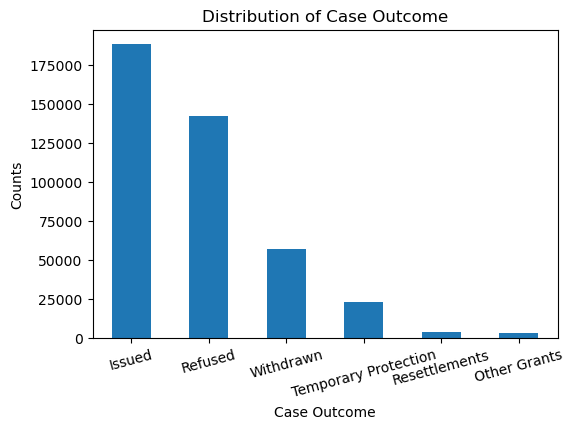

In [21]:
import matplotlib.pyplot as plt
case_outcome_counts = clean_df['Case outcome'].value_counts()
plt.figure(figsize=(6, 4)) 

case_outcome_counts.plot(kind='bar')
plt.title("Distribution of Case Outcome")
plt.xlabel("Case Outcome")
plt.ylabel("Counts")
plt.xticks(rotation=15)  
plt.show()

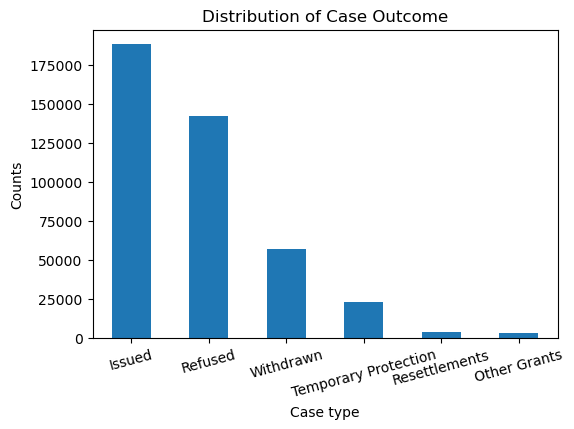

In [22]:
case_type_counts = clean_df['Case type'].value_counts()
plt.figure(figsize=(6, 4)) 

case_outcome_counts.plot(kind='bar')
plt.title("Distribution of Case Outcome")
plt.xlabel("Case type")
plt.ylabel("Counts")
plt.xticks(rotation=15)
plt.show()

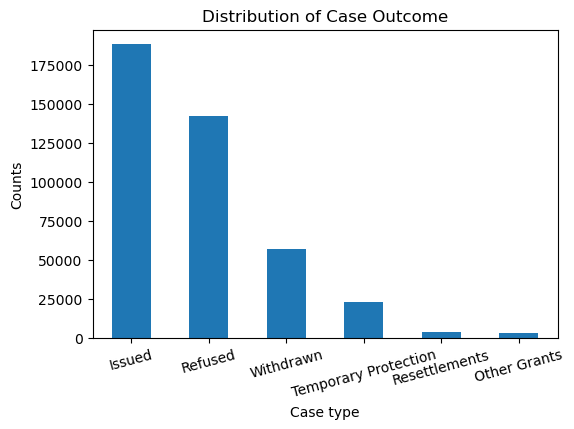

In [23]:
case_outcome_group_counts = clean_df['Case outcome group'].value_counts()
plt.figure(figsize=(6, 4)) 

case_outcome_counts.plot(kind='bar')
plt.title("Distribution of Case Outcome")
plt.xlabel("Case type")
plt.ylabel("Counts")
plt.xticks(rotation=15)
plt.show()

Checkout the shape of how many cells don't match from 'Case outcome group' and 'Case outcome'. The objective is to remove the group because it seems redundant.

In [24]:
clean_df[clean_df["Case outcome group"] != clean_df['Case outcome']].shape

(944952, 28)

checking rows where the values in the "Case outcome group" column do not match the values in the "Case outcome" column

In [25]:
clean_df[clean_df["Case outcome group"] != clean_df['Case outcome']].shape

(944952, 28)

There is a lot of nulls still regards. Since the mismatches are the same number of rows, the case columns look ok, we can keep them instead of dropping
But generally we need reduce the nulls through imputations

Let's display 'Case outcome', our main variable

In [26]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  188307
Refused                 142119
Withdrawn                57215
Temporary Protection     22768
Resettlements             3514
Other Grants              2921
Name: count, dtype: int64

Making a copy of the Case outcome so we can see how many matches or mismatches there are

This way we don't have to modify the df we're working on

Using the len function to count the number of matches and mismatches

In [32]:
temp_case_outcome = clean_df['Case outcome'].copy()
temp_case_outcome_group = clean_df['Case outcome group'].copy()

matches = clean_df[temp_case_outcome == temp_case_outcome_group]
mismatches = clean_df[temp_case_outcome != temp_case_outcome_group]

print(f"Total matches: {len(matches)}")
print(f"Total mismatches: {len(mismatches)}")


Total matches: 67773
Total mismatches: 944952


OK there is a fair amont of matches, and a lot of mismatches

Let's review some mismatched rows to understand the discrepancy

In [34]:
print(mismatches[['Case outcome', 'Case outcome group']].sample(10))

       Case outcome Case outcome group
825801       Issued                NaN
815860          NaN                NaN
989247          NaN                NaN
893032          NaN                NaN
571193       Issued                NaN
333385          NaN                NaN
516570          NaN                NaN
902088          NaN                NaN
175531          NaN                NaN
165664          NaN                NaN


Now we will synchronize the 'Case outcome' and 'Case outcome group' columns by filling missing values (NaNs) 

Then we will replace the empty strings

Specifically to replace empty strings in 'Case outcome' with the corresponding value from 'Case outcome group'. This way they can match, and vice versa

- For these rows, the value in "Case outcome" is replaced with the corresponding value from "Case outcome group". 
- Updated using .loc "Case outcome" to match "Case outcome group".
- Replacing empty strings with the value from the other column if one is empty and the other is not

Though there are a lot more populated rows in 'Case outcome' than Case outcome group

In [35]:
clean_df['Case outcome'] = clean_df['Case outcome'].fillna(clean_df['Case outcome group'])
clean_df['Case outcome group'] = clean_df['Case outcome group'].fillna(clean_df['Case outcome'])

clean_df.loc[clean_df['Case outcome'] == '', 'Case outcome'] = clean_df.loc[clean_df['Case outcome'] == '', 'Case outcome group']
clean_df.loc[clean_df['Case outcome group'] == '', 'Case outcome group'] = clean_df.loc[clean_df['Case outcome group'] == '', 'Case outcome']

matches = clean_df[clean_df['Case outcome'] == clean_df['Case outcome group']]
mismatches = clean_df[clean_df['Case outcome'] != clean_df['Case outcome group']]

print(f"After update, total matches: {len(matches)}")
print(f"After update, total mismatches: {len(mismatches)}")


#REF: https://stackoverflow.com/questions/42449169/overwriting-nan-values-with-loc-in-pandas, ChatGPT

C:\Users\patri\AppData\Local\Temp\ipykernel_1780\2920096918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['Case outcome'].fillna(clean_df['Case outcome group'], inplace=True)
C:\Users\patri\AppData\Local\Temp\ipykernel_1780\2920096918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Case outcome'].fillna(clean_df['C

After update, total matches: 374256
After update, total mismatches: 638469


Checking again for after update 

Let's check how many nulls there are now

In [36]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group           76.895043
Return type                 76.895043
Age                          0.000000
Sex                          0.000000
Return destination group    76.895043
Number of returns           76.895043
Visa type group             70.034898
Applicant type              52.157214
Case outcome                58.921874
Decisions                    0.000000
Case type                   88.886977
Case outcome group          88.886977
UASC                        82.122316
Application type            87.884675
Grants                       0.000000
Applications                 0.000000
Occupation                  83.824712
Industry                    83.824712
Occ. major group            83.824712
Occ. sub-major group        83.824712
Occ. minor group            83.824712
Occ. unit group             83.824712
General_Regi

OK now we can look at Case outcome, Case outcome group, and Case type

In [37]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  188307
Refused                 142119
Withdrawn                57215
Temporary Protection     22768
Resettlements             3514
Other Grants              2921
Name: count, dtype: int64

In [38]:
clean_df['Case outcome group'].value_counts()

Case outcome group
Issued                  174922
Refused                 142119
Withdrawn                61143
Grant of Protection      29237
Grant of Other Leave      9423
Name: count, dtype: int64

In [39]:
clean_df['Case type'].value_counts()

Case type
Asylum Case          106847
Resettlement Case      3514
Name: count, dtype: int64

s a group-by operation on the clean_df DataFrame, aggregates statistics for the 'Total Application and Decisions' column based on the 'Case outcome' groups, and then prints the resulting summary statistics.

groups the DataFrame by unique values in the 'Case outcome' column

(agg) function is applied specifically to the 'Total Application and Decisions' column of each group. The agg function allows multiple aggregation operations to be specified simultaneously.

stored in a new DataFrame called aggregated.


    

In [40]:
aggregated = clean_df.groupby('Case outcome')['Total Application and Decisions'].agg(
    Min='min',
    Max='max',
    Average='mean',
    Median='median',
    Count='count'
)

print(aggregated)

                      Min       Max     Average  Median   Count
Case outcome                                                   
Issued                1.0  234827.0  231.028443     6.0  188307
Other Grants          1.0      26.0    1.777816     1.0    2921
Refused               1.0   33430.0   55.019012     3.0  142119
Resettlements         1.0    1551.0   16.292544     2.0    3514
Temporary Protection  1.0    2122.0    9.872628     2.0   22768
Withdrawn             1.0    9062.0    6.890169     2.0   57215


In [41]:
aggregated2 = clean_df.groupby('Case type')['Total Application and Decisions'].agg(
    Min='min',
    Max='max',
    Average='mean',
    Median='median',
    Count='count'
)

print(aggregated2)


                   Min     Max    Average  Median   Count
Case type                                                
Asylum Case        1.0  2940.0   9.479817     2.0  106847
Resettlement Case  1.0  1551.0  16.292544     2.0    3514


In [42]:
aggregated3 = clean_df.groupby('Case outcome group')['Total Application and Decisions'].agg(
    Min='min',
    Max='max',
    Average='mean',
    Median='median',
    Count='count'
)

print(aggregated3)


                      Min       Max     Average  Median   Count
Case outcome group                                             
Grant of Other Leave  1.0    2689.0    8.679720     1.0    9423
Grant of Protection   1.0    2122.0   10.031980     2.0   29237
Issued                1.0  234827.0  248.074553     7.0  174922
Refused               1.0   33430.0   55.019012     3.0  142119
Withdrawn             1.0    9062.0    6.818900     2.0   61143


Now let's plot all 3 cases so we can examine the destributions

In [ ]:
case_type_counts = clean_df['Case type'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=case_type_counts.index, y=case_type_counts.values)
plt.title('Distribution of Case Types')
plt.xticks(rotation=15)
plt.show()


In [ ]:
case_outcome_counts = clean_df['Case outcome'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=case_outcome_counts.index, y=case_outcome_counts.values)
plt.title('Distribution of Case Outcomes')
plt.xticks(rotation=15)
plt.show()


In [ ]:
case_outcome_group_counts = clean_df['Case outcome group'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=case_outcome_group_counts.index, y=case_outcome_group_counts.values)
plt.title('Distribution of Case Outcome Groups')
plt.xticks(rotation=15)
plt.show()

OK we will use Visa Outcomes, Age, and so on, to further fill out the data
Moving on to visa outcomes and age

<div id='Visa_Outcomes'></div>

### Observation x: Visa Outcomes

In [43]:
clean_df['Visa type group'].value_counts()

Visa type group
Work                            93704
Study                           59550
Other                           59218
Family                          44233
Visitor                         32570
Dep. joining or accompanying    17208
Name: count, dtype: int64

## Age

<div id='Age'></div>

Let's look at 'Age', which has 0 nulls but quite a number of Unknowns. Let's try to get the # of unknowns down

Looking at the column

In [ ]:
clean_df['Age'].value_counts()

We have a lot of unknowns, so making a filter to show rows where 'Age' is 'Unknown' and 'Visa type group' is 'Study'

This way we can correct it for the range of 18-29 old in 'Age'

In [ ]:
filter_age_unknown = clean_df[(clean_df['Visa type group'] == 'Study') & (clean_df['Age'] == 'Unknown')]
age_study = filter_age_unknown[['Visa type group', 'Age']]

print(age_study)

OK there are 59,550 rows we can fill out

The first line updates for specific rows, where 'Age' = Unknown, and 'Visa type group' is 'Study'.

For these specific rows, we are setting 'Age' to '18 to 29' becuase we're assuming people in study visas are likely in this range 

After that, to vertify the results, we are filtering clean_df to only include 'Visa type group' rows that have 'Study' and the updated 'Age' range of '18 to 29'

In [ ]:
clean_df.loc[(clean_df['Age'] == 'Unknown') & (clean_df['Visa type group'] == 'Study'), 'Age'] = '18 to 29'
updated_rows = clean_df[(clean_df['Visa type group'] == 'Study') & (clean_df['Age'] == '18 to 29')]

print(updated_rows[['Visa type group', 'Age']])

We can use this to improve the 3 case columns

We are defining a condition where 'Age' = to the same range as above, and where case outcome, case type, and case outcome group are na

Then we apply the condion using .loc to set these values to be Issued, instead of na

In [ ]:
condition = (clean_df['Age'] == '18 to 29') & (clean_df['Case outcome'].isna()) & (clean_df['Case type'].isna()) & (clean_df['Case outcome group'].isna())
clean_df.loc[condition, ['Case outcome', 'Case type', 'Case outcome group']] = 'Issued'

print(clean_df.loc[condition, ['Age', 'Case outcome', 'Case type', 'Case outcome group']])

On this subject, let's look at the column UASC, which is an abbreviation for Unaccompanied Asylum Seeking Children

In [44]:
clean_df['UASC'].value_counts()

UASC
Non-UASC              142359
Total (pre-2006)       18944
UASC                   13110
Resettlement - N/A      3514
Name: count, dtype: int64

condition is defined where the 'UASC' column's values are equal to 'UASC'

rows meeting the condition (i.e., where 'UASC' equals 'UASC'), the 'Age' column is updated to the string 'Child'. This operation is performed in-place, directly modifying clean_df

 .sum() method counts how many times the condition is True, effectively counting how many rows were updated

In [ ]:
condition_uasc_to_child = (clean_df['UASC'] == 'UASC')

clean_df.loc[condition_uasc_to_child, 'Age'] = 'Child'

updated_rows_uasc_to_child = condition_uasc_to_child.sum()

print(f"Rows updated where 'UASC' equals 'uasc' and 'Age' was set to 'Child': {updated_rows_uasc_to_child}")
print(clean_df.loc[condition_uasc_to_child, ['Age', 'UASC']])

Now let's look at the distribution of age, maybe we can make some imputations

In [ ]:
age_counts = clean_df['Age'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Distribution of Age')
plt.xticks(rotation=15)
plt.show()

In [ ]:
aggregated_age = clean_df.groupby('Age')['Total Application and Decisions'].agg(
    Min='min',
    Max='max',
    Average='mean',
    Median='median',
    Count='count'
)

print(aggregated_age)

OK we can use this information to see who are children. Overall, this script is a data cleaning step, filling in missing data based on UASC status

Also we have some infomation on resettlements, and we can see that all of them would have been Issuances, in one way or another

So we can use this to update the cases through defining conditions

Making 2 conditions whether the case columns are blank or null

Condition 1 is'UASC' or'Non-UASC' or 'Total (pre-2006)', for any of the columns 'Case outcome', 'Case type', or 'Case outcome group' that are null and missing data

Condition 2 is 'UASC' = 'UASC', indicating Unaccompanied Asylum-Seeking Child, and again any of the 'Case outcome', 'Case type', or 'Case outcome group' columns are null

Then we are applying the updates using .loc based on these 2 conditions

In [ ]:
condition1_uasc = ((clean_df['UASC'] == 'Non-UASC') | (clean_df['UASC'] == 'Total (pre-2006)')) & (clean_df['Case outcome'].isna() | clean_df['Case type'].isna() | clean_df['Case outcome group'].isna())
condition2_uasc = (clean_df['UASC'] == 'UASC') & (clean_df['Case outcome'].isna() | clean_df['Case type'].isna() | clean_df['Case outcome group'].isna())

matching_rows_condition1 = condition1_uasc.sum()
matching_rows_condition2 = condition2_uasc.sum()

clean_df.loc[condition1_uasc, ['Case outcome', 'Case type', 'Case outcome group']] = 'Issued'
clean_df.loc[condition2_uasc, ['Case outcome', 'Case type', 'Case outcome group']] = ['Issued', 'Asylum Case', 'Issued']

# Print the number of rows updated for each condition
print(f"Rows updated for condition 1 (Non-UASC or Total (pre-2006)): {matching_rows_condition1}")
print(f"Rows updated for condition 2 (UASC): {matching_rows_condition2}")


In [ ]:
clean_df.isna().sum()/df_combined.shape[0]*100

OK we definitely getting there. Let's look at Applicant type, Application type, Return destination group

In [ ]:
clean_df['Applicant type'].value_counts()

We can see here that all these would have been issuances, and we have some specifics we can use

Dependants we can set to a lower age range

In [45]:
clean_df['Application type'].value_counts()

Application type
Naturalisation based on residence    51275
Naturalisation based on marriage     34862
Registration of minor children       23387
Registration on other grounds        15074
Name: count, dtype: int64

All these would have been issuances as well, and we have ~23K that we can confirm as being a younger age

Returns are different because these are individuals that were returned to their home country or somewhere else, assumingly from a rejection in the UK

In [46]:
clean_df['Return destination group'].value_counts()

Return destination group
Home country       91826
EU Member State    64042
Other country      50354
Home Country       23542
Name: count, dtype: int64

OK we can assume all these were rejections, so we can improve our case data set

We can also improve the return columns to be marked as "Case issued", instead of null

In [ ]:
condition1_applicant_type = ((clean_df['Applicant type'] == 'Main Applicant') | (clean_df['Applicant type'] == 'All') | (clean_df['Applicant type'] == 'Main applicant') | (clean_df['Applicant type'] == 'Dependant')) & (clean_df['Case outcome'].isna() | clean_df['Case type'].isna() | clean_df['Case outcome group'].isna())
condition2_applicant_type = (clean_df['Applicant type'] == 'Resettlement - N/A') & (clean_df['Case outcome'].isna() | clean_df['Case type'].isna() | clean_df['Case outcome group'].isna())

matching_rows_condition1_at = condition1_applicant_type.sum()
matching_rows_condition2_at = condition2_applicant_type.sum()

clean_df.loc[condition1_applicant_type, ['Case outcome', 'Case type', 'Case outcome group']] = 'Issued'
clean_df.loc[condition2_applicant_type, ['Case outcome', 'Case type', 'Case outcome group']] = 'Resettlement'

print(f"Rows updated for condition 1 (Issued): {matching_rows_condition1_at}")
print(f"Rows updated for condition 2 (Resettlement): {matching_rows_condition2_at}")


Define the single condition that encompasses all the specified 'Application type' categories
and checks for missing values in the relevant columns
count matching rows for the condition


In [ ]:
condition_application_type = (
    clean_df['Application type'].isin([
        'Naturalisation based on residence',
        'Naturalisation based on marriage',
        'Registration of minor children',
        'Registration on other grounds'
    ]) & (
        clean_df['Case outcome'].isna() |
        clean_df['Case type'].isna() |
        clean_df['Case outcome group'].isna()
    )
)

matching_rows_application_type = condition_application_type.sum()
clean_df.loc[condition_application_type, ['Case outcome', 'Case type', 'Case outcome group']] = 'Issued'
print(f"Rows updated for 'Application type' conditions to 'Issued': {matching_rows_application_type}")

In [ ]:
clean_df.isna().sum()/df_combined.shape[0]*100

Note there are two versions of Home country (C and c)

In [ ]:
condition_return_destination = (
    clean_df['Return destination group'].isin([
        'Home country',
        'EU Member State',
        'Other country',
        'Home Country'  y
    ]) & (
        clean_df['Case outcome'].isna() |
        clean_df['Case type'].isna() |
        clean_df['Case outcome group'].isna()
    )
)

matching_rows_return_destination = condition_return_destination.sum()

clean_df.loc[condition_return_destination, ['Case outcome', 'Case type', 'Case outcome group']] = 'Refused'

print(f"Rows updated for 'Return destination group' conditions to 'Refused': {matching_rows_return_destination}")


In [ ]:
clean_df['Occupation'].value_counts()

Let's do the same for occupation and case nas

In [ ]:
condition_occupation = (
    clean_df['Occupation'].notna() &  # Checks for any non-NA value in 'Occupation'
    (
        clean_df['Case outcome'].isna() |
        clean_df['Case type'].isna() |
        clean_df['Case outcome group'].isna()
    )
)

matching_rows_occupation = condition_occupation.sum()

clean_df.loc[condition_occupation, ['Case outcome', 'Case type', 'Case outcome group']] = 'Sponsored Work Visa'

print(f"Rows updated with 'Occupation' to 'Sponsored Work Visa': {matching_rows_occupation}")


In [ ]:
clean_df.isna().sum()/df_combined.shape[0]*100

Define the condition where 'Case outcome' is not NA, but any of the occupation-related columns are NA
List of columns to update
using loc # Update the specified columns for rows matching the condition


In [ ]:
condition_non_work_visa = (
    clean_df['Case outcome'].notna() & (
        clean_df['UASC'].isna() 
    )
)

columns_to_update = [
    'Occupation',
    'Industry',
    'Occ. major group',
    'Occ. sub-major group',
    'Occ. minor group',
    'Occ. unit group'
]

clean_df.loc[condition_non_work_visa, columns_to_update] = 'Non-Work Visa Related Case Outcome'

updated_rows = condition_non_work_visa.sum()
print(f"Rows updated to 'Non-Work Visa Related Case Outcome': {updated_rows}")

Define the condition where 'Case outcome' is not NA, but 'UASC' is NA
# Update the 'UASC' column for rows matching the condition to 'Non-UASC'


In [ ]:
condition_non_uasc = clean_df['Case outcome'].notna() & clean_df['UASC'].isna()

clean_df.loc[condition_non_uasc, 'UASC'] = 'Non-UASC'

updated_rows_non_uasc = condition_non_uasc.sum()
print(f"Rows updated to 'Non-UASC': {updated_rows_non_uasc}")

Define the condition where 'Decisions' is 0 or NA
Update 'Decisions' to be equal to 'Number of Returns' where the condition is met
the decisions_update 2 is foro Applications and Decisions

In [ ]:
condition_decisions_update = (clean_df['Decisions'] == 0) | (clean_df['Decisions'].isna())

clean_df.loc[condition_decisions_update, 'Decisions'] = clean_df.loc[condition_decisions_update, 'Number of returns']

updated_rows_decisions = condition_decisions_update.sum()
print(f"Rows updated where 'Decisions' was set to 'Number of Returns': {updated_rows_decisions}")

In [ ]:
condition_decisions_update2 = (clean_df['Decisions'] == 0) | (clean_df['Decisions'].isna())

clean_df.loc[condition_decisions_update2, 'Decisions'] = clean_df.loc[condition_decisions_update, 'Applications']

updated_rows_decisions2 = condition_decisions_update2.sum()
print(f"Rows updated where 'Decisions' was set to 'Applications': {updated_rows_decisions2}")

OK now that those are done, let's check for how many 0s are in our df now

In [ ]:
zero_percentage_numeric2 = (clean_df == 0).sum() / clean_df.shape[0] * 100
print(zero_percentage_numeric2)

Saving and moving to the next book. We are now onto the baseline modelling part

We can continue some pre-processing and feature engineering later

But it feels like we have filled out enough for a decent inital baseline model

In [ ]:
df_combined.to_csv('C:/Users/patri/Downloads/df_combined_EDA_2.csv', index=False)